In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.clear_session() 

### Define model

In [3]:
inputs = keras.Input(shape=(32, 32, 3), name='img')

In [4]:
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)
block_1_output.shape

TensorShape([None, 9, 9, 64])

In [5]:
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])
block_2_output.shape

TensorShape([None, 9, 9, 64])

In [6]:
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])
block_3_output.shape

TensorShape([None, 9, 9, 64])

In [7]:
x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
outputs.shape

TensorShape([None, 10])

In [8]:
model = keras.Model(inputs, outputs, name='toy_resnet')

In [9]:
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

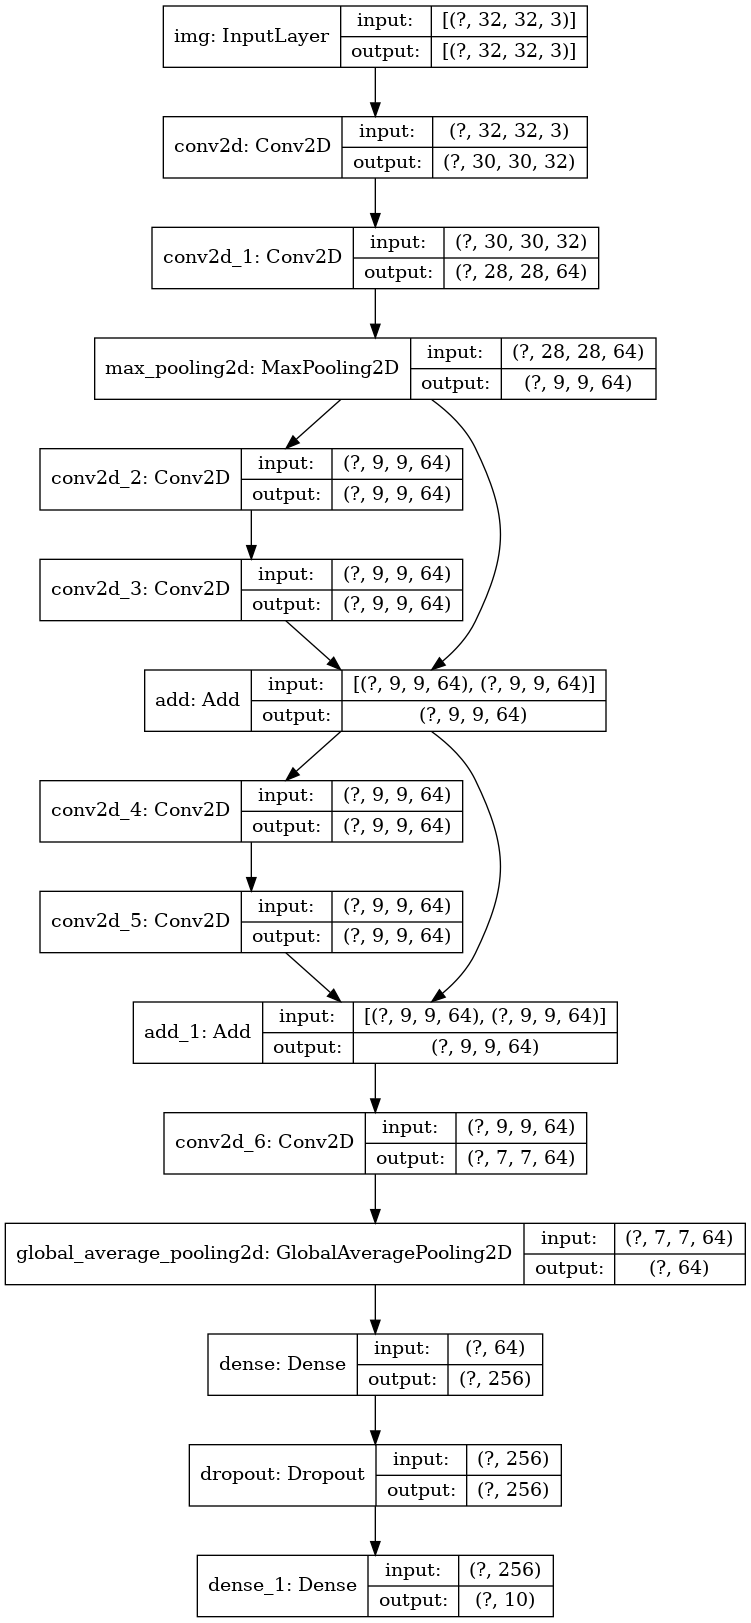

In [10]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

## Train Model

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [18]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 26s 654us/sample - loss: 1.4051 - acc: 0.4863 - val_loss: 1.2844 - val_acc: 0.5120
Epoch 2/5
40000/40000 [==============================] - 26s 642us/sample - loss: 1.2101 - acc: 0.5653 - val_loss: 1.1583 - val_acc: 0.6029
Epoch 3/5
40000/40000 [==============================] - 26s 645us/sample - loss: 1.0565 - acc: 0.6255 - val_loss: 1.0356 - val_acc: 0.6308
Epoch 4/5
40000/40000 [==============================] - 26s 644us/sample - loss: 0.9475 - acc: 0.6708 - val_loss: 0.9592 - val_acc: 0.6675
Epoch 5/5
40000/40000 [==============================] - 26s 644us/sample - loss: 0.8569 - acc: 0.7019 - val_loss: 0.8957 - val_acc: 0.6997


In [19]:
test_scores = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 2s - loss: 0.9147 - acc: 0.6897
